In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [585]:
trend_data = pd.read_csv("Trend Data Dashboard.csv", index_col=0)
display(trend_data.head())

,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
Platform,,,,,,,,,
TikTok,202006,I Win,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,7,NaN
TikTok,202006,I am Jose Mourinho,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
TikTok,202006,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
TikTok,202006,That's My Life (Hilary Duff),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
TikTok,202006,Hot New Bombshell (Love Island),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,6,NaN


In [586]:
trend_data["Month"] = trend_data['Month'] % 100
display(trend_data.head(10))

,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
Platform,,,,,,,,,
TikTok,6,I Win,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,7,NaN
TikTok,6,I am Jose Mourinho,Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
TikTok,6,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
TikTok,6,That's My Life (Hilary Duff),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
TikTok,6,Hot New Bombshell (Love Island),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,6,NaN
TikTok,6,Guilty (Kim Kardashian),Lip Sync (dialogue),NaN,Selfie Video,Comedy,NaN,5,NaN
TikTok,6,Things People Have Said to Me,Dance + Lip Sync (music),Happiness - Alexis Jordan (2010),Selfie Video,Comedy,Chorus,24,R&B
TikTok,6,Benny and the Jets x Chiquitita,Montage,Benny and the Jets - Elton John (1974) Chiquit...,Photo/Video Compilation,Lifestyle,Prelude; Interlude,12,Rock; Pop
TikTok,6,Feel No Ways (took one for the team),Dance + Filter,Feel No Ways - Drake (2016),Video with Horace filter,Comedy,First verse,5,Hip-Hop/Rap


In [587]:
null_counts = trend_data.isnull().sum()
null_counts

Month                 0
Trend                 0
Trend Type            0
Music                14
Video Style           0
Theme                 0
Part of Song         14
Video length in S     0
Music Genre          14
dtype: int64

In [588]:
trend_data = trend_data.dropna()
trend_data.head()

,Month,Trend,Trend Type,Music,Video Style,Theme,Part of Song,Video length in S,Music Genre
Platform,,,,,,,,,
TikTok,6,I'm Gonna Live Forever,Lip Sync (music),Fame - Irene Cara (1980),Selfie Video,Comedy,Chorus,8,Pop
TikTok,6,Things People Have Said to Me,Dance + Lip Sync (music),Happiness - Alexis Jordan (2010),Selfie Video,Comedy,Chorus,24,R&B
TikTok,6,Benny and the Jets x Chiquitita,Montage,Benny and the Jets - Elton John (1974) Chiquit...,Photo/Video Compilation,Lifestyle,Prelude; Interlude,12,Rock; Pop
TikTok,6,Feel No Ways (took one for the team),Dance + Filter,Feel No Ways - Drake (2016),Video with Horace filter,Comedy,First verse,5,Hip-Hop/Rap
TikTok,6,Sands (Background Music),"Text on Screen, Vlog",Sands - Lethilda (2021),"Selfie Video, Photo/Video Compilation",Lifestyle,First verse,8,Pop


In [589]:
trend_data.drop('Music', axis=1, inplace=True)
trend_data.drop('Trend', axis=1, inplace=True)
display(trend_data.head(10))

,Month,Trend Type,Video Style,Theme,Part of Song,Video length in S,Music Genre
Platform,,,,,,,
TikTok,6,Lip Sync (music),Selfie Video,Comedy,Chorus,8,Pop
TikTok,6,Dance + Lip Sync (music),Selfie Video,Comedy,Chorus,24,R&B
TikTok,6,Montage,Photo/Video Compilation,Lifestyle,Prelude; Interlude,12,Rock; Pop
TikTok,6,Dance + Filter,Video with Horace filter,Comedy,First verse,5,Hip-Hop/Rap
TikTok,6,"Text on Screen, Vlog","Selfie Video, Photo/Video Compilation",Lifestyle,First verse,8,Pop
TikTok,7,Montage,Photo/Video Compilation,Lifestyle,Chorus,12,Pop Rock
TikTok,7,Montage,Photo/Video Compilation,Lifestyle,Prelude,7,Instrumental
TikTok,7,"Transition, Vlog",Selfie Video,Lifestyle,Bridge,7,Hip-Hop/Rap
TikTok,7,Text on Screen + Lip Sync (dialogue),Selfie Video,Comedy,Chorus; Beginning,14,Country; Instrumental


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Lifestyle'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Lifestyle, Travel')])

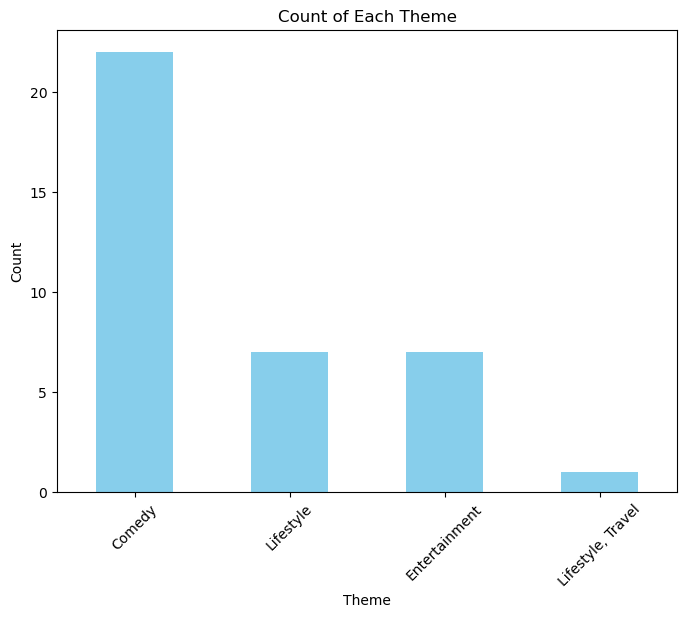

In [590]:
theme_counts = df['Theme'].value_counts()
theme_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Theme')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Text on Screen + Lip Sync (dialogue)'),
  Text(1, 0, 'Lip Sync (dialogue)'),
  Text(2, 0, 'Montage'),
  Text(3, 0, 'Text on Screen'),
  Text(4, 0, 'Text on Screen + Lip Sync (music)'),
  Text(5, 0, 'Act Out'),
  Text(6, 0, 'Dance'),
  Text(7, 0, 'Dance + Challenge'),
  Text(8, 0, 'Lip Sync (music)'),
  Text(9, 0, 'Dance + Lip Sync (music)'),
  Text(10, 0, 'Dance + Filter'),
  Text(11, 0, 'Text on Screen, Vlog'),
  Text(12, 0, 'Transition, Vlog'),
  Text(13, 0, 'Hashtag'),
  Text(14, 0, 'Hashtag + Challenge'),
  Text(15, 0, 'Transition')])

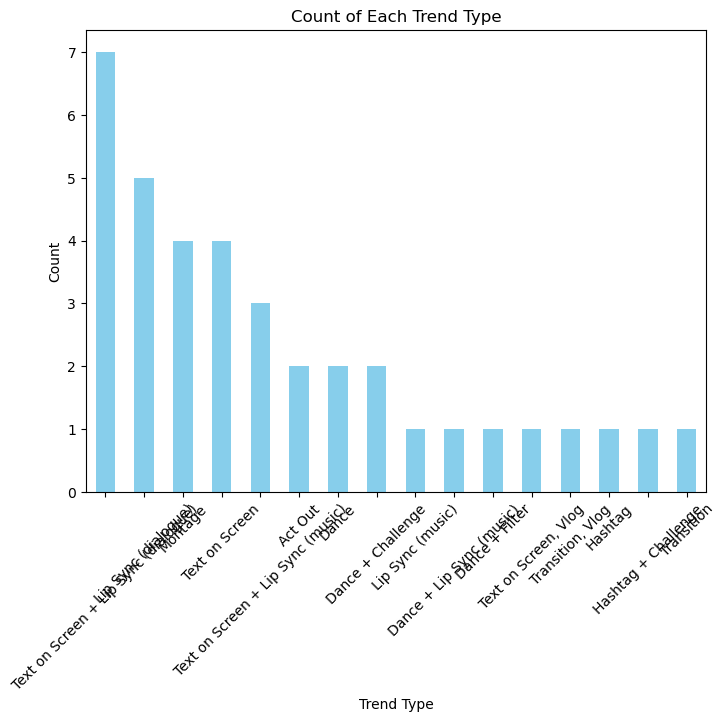

In [591]:
trend_type_counts = df['Trend Type'].value_counts()
trend_type_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Trend Type')
plt.xlabel('Trend Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Chorus'),
  Text(1, 0, 'First verse'),
  Text(2, 0, 'Verse (instrumental)'),
  Text(3, 0, 'Prelude; Interlude'),
  Text(4, 0, 'Prelude'),
  Text(5, 0, 'Bridge'),
  Text(6, 0, 'Chorus; Beginning'),
  Text(7, 0, 'Verse')])

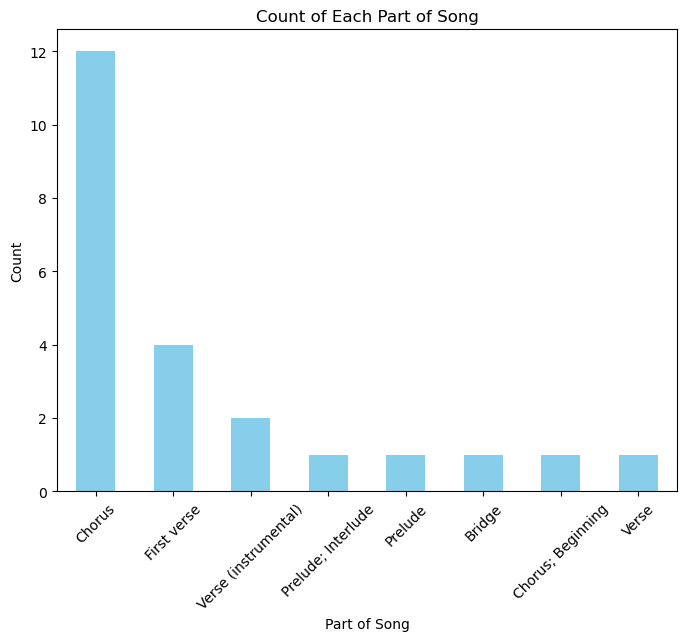

In [592]:
song_part_counts = df['Part of Song'].value_counts()
song_part_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Part of Song')
plt.xlabel('Part of Song')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Pop'),
  Text(1, 0, 'R&B'),
  Text(2, 0, 'Hip-Hop/Rap'),
  Text(3, 0, 'Pop Rock'),
  Text(4, 0, 'Rock; Pop'),
  Text(5, 0, 'Instrumental'),
  Text(6, 0, 'Country; Instrumental')])

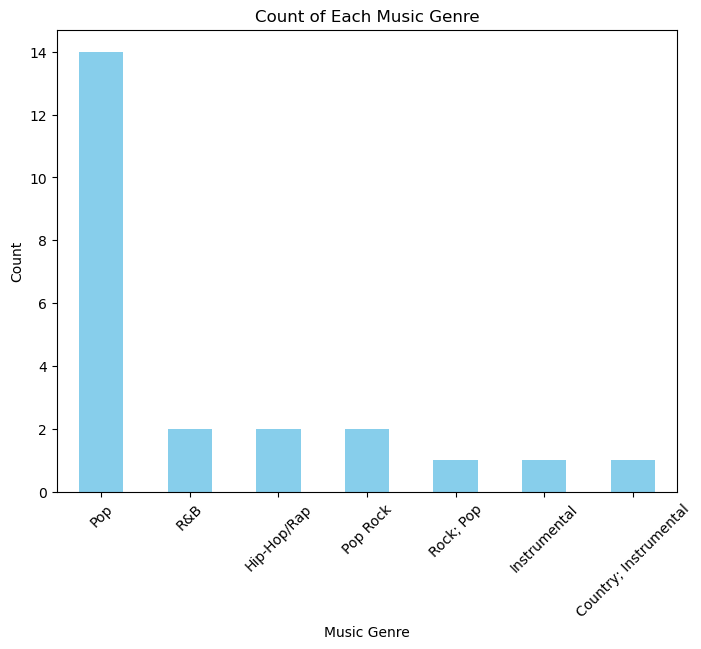

In [593]:
music_genre_counts = df['Music Genre'].value_counts()
music_genre_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Music Genre')
plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [594]:
music_genre_mapped = {
    'Pop': 1,
    'R&B': 2,
    'Hip-Hop/Rap': 3,
    'Pop Rock': 4,
    'Rock; Pop': 5,
    'Instrumental': 6,
    'Country; Instrumental': 7
}
df['music_genre_encoded'] = df['Music Genre'].map(music_genre_mapped).fillna(0).astype(int)

In [595]:
song_part_mapped = {
    'Chorus': 1,
    'First verse': 2,
    'Verse (instrumental)': 3,
    'Prelude; Interlude': 4,
    'Prelude': 5,
    'Bridge': 6,
    'Chorus; Beginning': 7,
    'Verse': 8
}
df['song_part_encoded'] = df['Part of Song'].map(song_part_mapped).fillna(0).astype(int)

In [596]:
theme_mapped = {'Comedy': 1, 'Lifestyle': 2, 'Entertainment': 3, 'Lifestyle, Travel': 4}
df['theme_encoded'] = df['Theme'].map(theme_mapped).fillna(0).astype(int)

In [597]:
trend_type_mapped = {
    'Text on Screen + Lip Sync (dialogue)': 1,
    'Lip Sync (dialogue)': 2,
    'Montage': 3,
    'Text on Screen': 4,
    'Text on Screen + Lip Sync (music)': 5,
    'Act Out': 6,
    'Dance': 7,
    'Dance + Challenge': 8,
    'Lip Sync (music)': 9,
    'Dance + Lip Sync (music)': 10,
    'Dance + Filter': 11,
    'Text on Screen, Vlog': 12,
    'Transition, Vlog': 13,
    'Hashtag': 14,
    'Hashtag + Challenge': 15,
    'Transition': 16
}
df['trend_type_encoded'] = df['Trend Type'].map(trend_type_mapped).fillna(0).astype(int)

In [598]:
platform_mapped = {'TikTok': 0, 'YouTube Shorts': 1}
df['platform_encoded'] = df['Platform'].map(platform_mapped).fillna(0).astype(int)

In [682]:
X = df[['trend_type_encoded', 'platform_encoded', 'song_part_encoded', 'music_genre_encoded']]
Y = df['theme_encoded']

In [684]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [686]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.48183797720186505


In [688]:
Y_pred1 = reg.predict(X_test)

In [690]:
mae1 = mean_absolute_error(Y_test, Y_pred1).round(2)
mse1 = mean_squared_error(Y_test, Y_pred1).round(2)
mape1 = ((np.mean(np.abs(Y_test-Y_pred1)/Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 0.39
 MSE:0.23 
 MAPE:0.6%.
